USING TWITTER TO COLLECT TWEETS BY BY UGANDAN "INFLUENCERS" TO DO SOME NATURAL LANGUAGE PROCESSING AND OR SENTIMENT ANALYSIS

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import tweepy
import csv
import json

# load Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    api_key = info['API_KEY']
    api_secret = info['API_SECRET']
    access_token_key = info['ACCESS_TOKEN_KEY']
    access_token_secret = info['ACCESS_TOKEN_SECRET']

def get_all_tweets(screen_name):

    # Twitter allows access to only 3240 tweets via this method

    # Authorization and initialization

    auth = tweepy.OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token_key, access_token_secret)
    api = tweepy.API(auth)

    # initialization of a list to hold all Tweets

    all_the_tweets = []

    # We will get the tweets with multiple requests of 200 tweets each

    new_tweets = api.user_timeline(screen_name=screen_name, count=200)

    # saving the most recent tweets

    all_the_tweets.extend(new_tweets)

    # save id of 1 less than the oldest tweet

    oldest_tweet = all_the_tweets[-1].id - 1

    # grabbing tweets till none are left

    while len(new_tweets):
        # The max_id param will be used subsequently to prevent duplicates
        new_tweets = api.user_timeline(screen_name=screen_name,
        count=200, max_id=oldest_tweet)

        # save most recent tweets

        all_the_tweets.extend(new_tweets)

        # id is updated to oldest tweet - 1 to keep track

        oldest_tweet = all_the_tweets[-1].id - 1
        print ('...%s tweets have been downloaded so far' % len(all_the_tweets))

        # transforming the tweets into a 2D array that will be used to populate the csv

        outtweets = [[tweet.id_str, tweet.created_at,
        tweet.text.encode('utf-8')] for tweet in all_the_tweets]

        # writing to the csv file

        with open('tweets/'  + screen_name + '.csv', 'w', encoding='utf8') as f:
            writer = csv.writer(f)
            writer.writerow(['id', 'created_at', 'text'])
            writer.writerows(outtweets)

if __name__ == '__main__':

# Enter the twitter handle of the person concerned

    get_all_tweets(input("Enter the twitter handle of the person whose tweets you want to download:- "))

Enter the twitter handle of the person whose tweets you want to download:- swabrashafiq
...381 tweets have been downloaded so far
...403 tweets have been downloaded so far
...403 tweets have been downloaded so far


In [ ]:
'''
1f AldrineEsther
1m PatoShanquels
2m Owishemwe
3m Genoeric
4m PirateMulwana
5m Sempijjastanle
2f Ugawoman
6m AndrewOmuge
7m EddiePages
8m Fineboykera
9m ki jesseology
10m howard jeff
11m travor ug
3f Cecilia97
4f lilbooty
5f ghostbae
6f methialydiaN
7f evlyn_nakayi
8f jonam's princess
9f praise atukunda

merge into one dataset and create a tweep column
also search for all twitter accounts by ugandans with more than 10k followers and a follower/following ratio of
more than 2
measure activity through frequency of tweets
measure how original tweeps are by looking and the number of tweets
assess how devoted followers are by comparing likes,retweets and comments to influencers' original tweets
'''

In [3]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from nltk.stem.porter import *
from wordcloud import WordCloud

style.use('fivethirtyeight')
warnings.filterwarnings("ignore", category=DeprecationWarning)

x = pd.read_csv('tweets/swabrashafiq.csv')

In [4]:
#  below is a user-defined function to remove unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
    '''It takes two arguments, one is the original string of text and the other is the 
        pattern of text that we want to remove from the string.'''
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# create a new column tidy_tweet, it will contain the cleaned and processed tweets
# remove twitter handles (@user)
x['tidy_tweet'] = np.vectorize(remove_pattern)(x['text'], "@[\w]*")

# Removing Punctuations, Numbers, and Special Characters
x['tidy_tweet'] = x['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

# Removing Short Words
x['tidy_tweet'] = x['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Tokenization
tokenized_tweet = x['tidy_tweet'].apply(lambda x: x.split())

# Stemming
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

#let’s stitch these tokens back together.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

x['tidy_tweet'] = tokenized_tweet

In [5]:
x.head()

,id,created_at,text,tidy_tweet
0,1177569588147609600,2019-09-27 13:04:02,"b'RT @Fact: Psychology says, you realize you l...",psycholog say realiz love someon when want the...
1,1177569382433734656,2019-09-27 13:03:13,b'RT @muftimenk: Almighty. Whenever we\xe2\x80...,almighti whenev stress anxiou afraid help reme...
2,1177105387658629121,2019-09-26 06:19:28,"b""RT @aysher_asher: Name: Ninsiima Aisha\nBirt...",name ninsiima aisha nbirthday nzodiac sign gem...
3,1177104527343964160,2019-09-26 06:16:03,"b""RT @RitashaFosh: I don't know who told men t...",know told that when have fight they have quiet...
4,1177103713909059584,2019-09-26 06:12:49,b'Me all the time in medical school \xf0\x9f\x...,time medic school http limpratid


Story Generation and Visualization from Tweets

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

    What are the most common words in the entire dataset?
    What are the most common words in the dataset for negative and positive tweets, respectively?
    How many hashtags are there in a tweet?
    Which trends are associated with my dataset?
    Which trends are associated with either of the sentiments? Are they compatible with the sentiments?


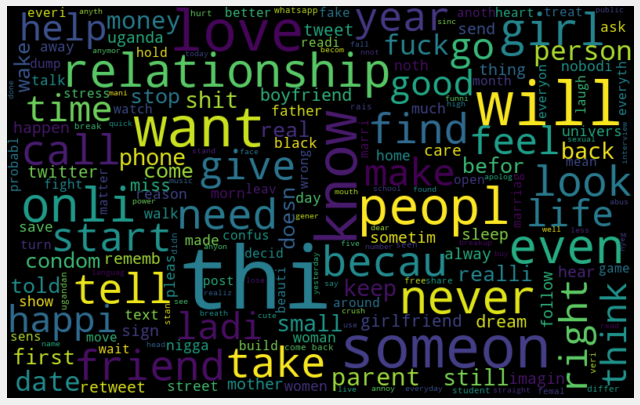

In [6]:
# Let’s visualize all the words our data using the wordcloud plot. 

all_words = ' '.join([text for text in x['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



Downloading all images uploaded by a twitter user:

In [7]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import tweepy
from tweepy import OAuthHandler
import json
import wget

# load Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    api_key = info['API_KEY']
    api_secret = info['API_SECRET']
    access_token_key = info['ACCESS_TOKEN_KEY']
    access_token_secret = info['ACCESS_TOKEN_SECRET']

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)

#Creating tweepy api
api = tweepy.API(auth)

user = input("Enter twitter user_id - ")

#Getting all tweets
all_tweets = api.user_timeline(screen_name=user, count=200,
include_rts=False, exclude_replies=True)

last_tweet_id = all_tweets[-1].id

#Getting more tweets
while True:
    more_tweets = api.user_timeline(screen_name=user, count=200,include_rts=False,exclude_replies=True,
    max_id=last_tweet_id - 1)

    if len(more_tweets) == 0:
        break
    else:
        last_tweet_id = more_tweets[-1].id - 1
        all_tweets = all_tweets + more_tweets

    image_files = set()
    for status in all_tweets:
        media = status.entities.get('media', [])
        if len(media):
            image_files.add(media[0]['media_url'])

    print ('Downloading ' + str(len(image_files)) + ' images.....')
    for image_file in image_files:
        wget.download(image_file)

Enter twitter user_id - swabrashafiq


Extracting tweets containing a particular hashtag from twitter:

In [41]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import tweepy
import csv
import json

# load Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    api_key = info['API_KEY']
    api_secret = info['API_SECRET']
    access_token_key = info['ACCESS_TOKEN_KEY']
    access_token_secret = info['ACCESS_TOKEN_SECRET']

# Create the api endpoint

auth = tweepy.OAuthHandler(api_key, api_secret)
api = tweepy.API(auth)

# Mention the maximum number of tweets that you want to be extracted.

maximum_number_of_tweets_to_be_extracted = int(input('Enter the number of tweets that you want to extract- '))

# Mention the hashtag that you want to look out for

hashtag = input('Enter the hashtag you want to scrape- ')

for tweet in tweepy.Cursor(api.search, q='#' + hashtag,rpp=100).items(maximum_number_of_tweets_to_be_extracted):
    with open('hashtags/' + hashtag + '.txt', 'a') as the_file:
        the_file.write(str(tweet.text.encode('utf-8')) + '\n')

print ('Extracted ' + str(maximum_number_of_tweets_to_be_extracted) + ' tweets with hashtag #' + hashtag)

Enter the number of tweets that you want to extract- 100
Enter the hashtag you want to scrape- CFAExam
Extracted 100 tweets with hashtag #CFAExam
